The purpose of this notetbook is to demonstrate how one might plot match events onto a relevant map image.

In [1]:
import sys
sys.path += ['../..']

import os

import tarfile
import json

import matplotlib.pyplot as plt

In [2]:
PATH_TO_CWL_DATA = '../data/structured/'
TAR_FILE_NAME = 'structured-2018-06-17-anaheim.tar.gz'

EVENT = 'structured-2018-06-17-anaheim/'
MATCH = 'structured-1529096957-f0a65936-4932-5c7c-a1b5-3a294762b2da.json'

PATH_TO_WW2_MAPS = '../maps/ww2/'

MAP_IMAGES = {
    'Aachen': 'aachen.png',
    'Ardennes Forest': 'ardennes_forest.png',
    'Flak Tower': 'flaktower.png',
    'Gibraltar': 'gibraltar.png',
    'London Docks': 'london_docks.png',
    'Sainte Marie du Mont': 'sainte_marie_du_mont.png' ,
    'USS Texas': 'uss_texas',
    'Valkyrie': 'valkyrie.png'
}

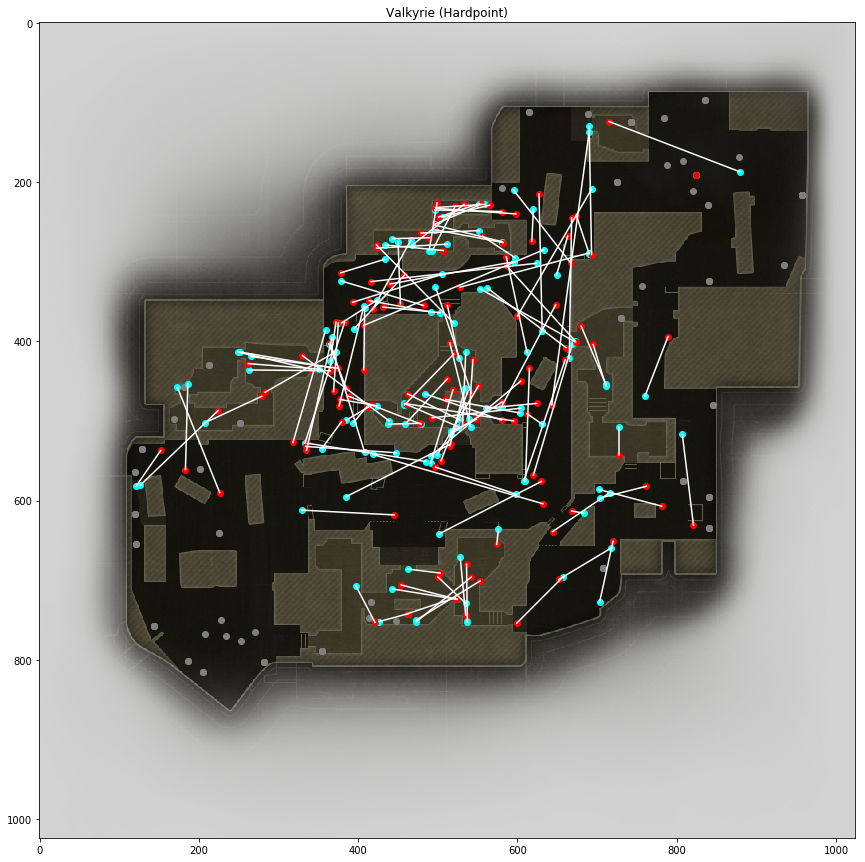

In [3]:
# extract match data from tarball
if not os.path.isfile('./{}{}'.format(EVENT, MATCH)):
    tar_file_name = PATH_TO_CWL_DATA + TAR_FILE_NAME
    tar = tarfile.open(tar_file_name)
    tar.extract(EVENT + MATCH)

# load match data and plot match events
with open('./{}{}'.format(EVENT, MATCH), 'r') as match_file:
    # get match data
    match = json.load(match_file)

    kill_pos, death_pos, spawn_pos = {'x': [], 'y': []}, {'x': [], 'y': []}, {'x': [], 'y': []}
    
    # get pos data
    events = match['events']
    for evt in events:
        if evt['type'] == 'spawn':
            spawn_pos['x'].append( evt['data']['pos']['x'] )
            spawn_pos['y'].append( evt['data']['pos']['y'] )
        if evt['type'] == 'death':
            kill_pos['x'].append( evt['data']['attacker']['pos']['x'] )
            kill_pos['y'].append( evt['data']['attacker']['pos']['y'] )
            death_pos['x'].append( evt['data']['pos']['x'] )
            death_pos['y'].append( evt['data']['pos']['y'] )

    # get map image
    map_file_name = PATH_TO_WW2_MAPS + MAP_IMAGES[match['map']]
    map_image = plt.imread(map_file_name)

    # create figure
    fig, ax = plt.subplots(1,1)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    # plot map
    ax.imshow(map_image)
    ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
    # plot spawns
    ax.scatter(spawn_pos['x'], spawn_pos['y'], color='gray')
    # plot death events
    ax.scatter(kill_pos['x'], kill_pos['y'], color='cyan')
    ax.scatter(death_pos['x'], death_pos['y'], color='red')
    # plot kill vectors
    for i in range( len(kill_pos['x']) ):
        plt.plot([kill_pos['x'][i], death_pos['x'][i]], [kill_pos['y'][i], death_pos['y'][i]], color='white')
    # set title
    ax.set_title('{} ({})'.format(match['map'], match['mode']))